# Intro to Nonlinearity

## Single Sextrupole in a Ring

Consider a thin sextrupole was added to an otherwise linear ring at $s_0$.  The Hill's equation will looks like:

\begin{align}
&x''+ k_x(s) x = \frac{S}{2} (y^2 - x^2) \delta(s-s_0)  \\
&y''+ k_y(s) x =  S x y  \delta(s-s_0) 
\end{align}
which can be derived from the Hamiltonian:

\begin{equation}
H= \frac{1}{2}x'^2+ \frac{1}{2}y'^2 + \frac{1}{2}k_x(s)x^2+\frac{1}{2}k_y(s)y^2+\delta(s-s_0)\frac{S}{6}(x^3-3xy^2)
\end{equation}

Using the action angle variable pairs ({eq}`eq:twiss:Jpsibar_to_xxp`) for $x$ and $y$:

\begin{align}
x&=\sqrt{2\beta_x J_x} \cos(\psi_x+ \chi_x(s) -\nu_x \theta) = \sqrt{2\beta_x J_x} \cos(\Phi_x)\\
y&=\sqrt{2\beta_y J_y} \cos(\psi_y+ \chi_y(s) -\nu_y \theta) = \sqrt{2\beta_y J_y} \cos(\Phi_y)\\
\end{align}

with 
\begin{equation}
\chi_x(s) = \int_0^s\frac{1}{\beta_x(s')}ds' \qquad \chi_y(s)=\int_0^s\frac{1}{\beta_y(s')}ds'
\end{equation}

Using the trigonometry identity $\cos^3\alpha = (\cos3x + 3\cos x)/4$, the potential part beomes:

\begin{align}
x^3-3xy^2 =& \frac{\sqrt{2}}{12}(\beta_x J_x)^{3/2} \cos3\Phi_x + \frac{\sqrt{2}}{4}(\beta_x J_x)^{1/2}(\beta_x J_x - \beta_y J_y) \cos\Phi_x  \nonumber\\
&-\frac{\sqrt{2}}{8}(\beta_x J_x)^{1/2}(\beta_y J_y) \cos(2\Phi_x+\Phi_y) -\frac{\sqrt{2}}{8}(\beta_x J_x)^{1/2}(\beta_y J_y) \cos(2\Phi_x-\Phi_y) \nonumber
\end{align}

The Hamiltonian becomes:
\begin{align}
H = \nu_x J_x + \nu_y J_y &+ \sum_l G_{3,0,l} J_x^{3/2} \cos(3\psi_x - l\theta + \xi_{3,0,l}) \\
& + \sum_l G_{1,2,l} J_x^{1/2} J_y \cos(\psi_x + 2 \psi_y - l\theta + \xi_{1,2,l})  \\
& + \sum_l G_{1,-2,l} J_x^{1/2} J_y \cos(\psi_x - 2 \psi_y - l\theta + \xi_{1,-2,l}) + \cdots
\end{align}
where $G$ and $\xi$ are the amplitudes and phases of the Fourier coefficients.  For example, 

$$
G_{3,0,l}e^{i\xi_{3,0,l}} = \frac{\sqrt{2}}{24\pi}\int_0^{2\pi}S\delta(s-s_0)\beta_x^{3/2} e^{j\left[3\chi_x(s)-(3\nu_x-l)\theta\right]} d\theta
$$

It seems that this single sextrupole can excite $3\nu_x = l$ and $\nu_x \pm 2\nu_y = l$ resonances.  However, through concatenation, one sextrupole in the ring can excite much more resonances, such as $4\nu_{x/y}=l$, $2\nu_x \pm 2\nu_y =l$, etc.

:::{admonition} Example: Sextrupole in a linear ring (4-D Henon map).
:class: tip
This examples illustrates different resonances excited by a sextrupole using the following map:

\begin{equation}
\left(\begin{array}{c}
x\\
x'\\
y\\
y'
\end{array}\right)_{n+1}=\left(\begin{array}{cc}
\textbf{R}(\mu_x) & 0\\
0 & \textbf{R}(\mu_y)
\end{array}\right)\left(\begin{array}{c}
x\\
x'-x^{2}+y^{2}\\
y\\
y' + 2 x y
\end{array}\right)_{n}
\end{equation}

In this case, $S$ is choosen to be 2.  One may notice that for the single sextrupole, the strength does not affect the dynamics, which can be eliminated by the scaling $\mathbf{z}=(x, x', y, y') \rightarrow \mathbf{z}/S$
:::

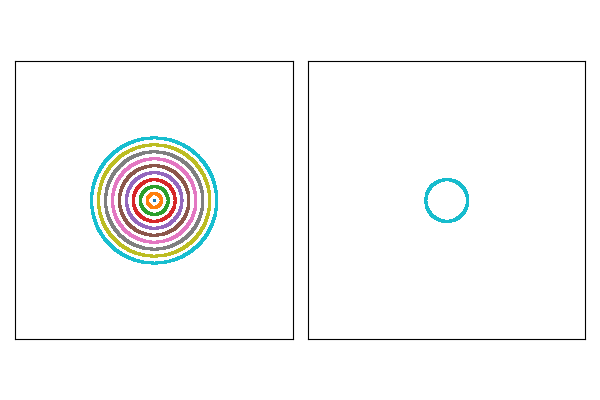

In [25]:
from map2D import map2D
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import animation
#from IPython.display import HTML
%matplotlib widget


#resonance 1/3

dvx=0.0003591
tunex=1.0/3.0+dvx
dvy=0.05
tuney=1.0/3.0+dvy
size_scale=0.001

#resonance 1/4
dvx=0.00005
tunex=1.0/4.0+dvx
dvy=0.005
tuney=1.0/4.0 + dvy
size_scale=0.03


#resonance 1/5
dvx=0.0001
tunex=1.0/5.0 + dvx
dvy=0.01
tuney=1.0/5.0 +dvy
size_scale=0.0205


#resonance nux + 2nuy = l
dvy=0.0002
tunex = 0.23
tuney = (1 - tunex) / 2 + dvy
size_scale = 0.001


# resonance nux = 2nuy 
dvy=0.000
tunex = 0.23
tuney = tunex / 2 + dvy

# resonance 2nux + nuy =l
dvy=0.000
tunex = 0.102
tuney = 1- tunex * 2 + dvy


pxs=np.concatenate([size_scale*np.arange(10), np.array([])])
pxps=np.zeros_like(pxs) 
particles=np.vstack([pxs,pxps])
xpx=map2D(npart=10, twiss=[1,0], twiss_beam=[1,0],tune=tunex, chrom=0.0, espr=0.0,
                  particles=particles)

pys=np.zeros_like(pxs) + size_scale * 3
pyps=np.zeros_like(pys) 
particles=np.vstack([pys,pyps])
ypy=map2D(npart=len(pxs), twiss=[1,0], twiss_beam=[1,0],tune=tuney, chrom=0.0, espr=0.0,
          particles=particles)

avex,avep,sizex,sizep,emit=xpx.statistics()
emitlist=[]
sizelist=[]
avelist=[]
N_turn=30000


def evolve_func(turns, kick_turn_start=0, B2=1,
               ):
    for i in range(turns):
        if i>=kick_turn_start:
            xpx.coor2D[1,:]-=B2*(xpx.coor2D[0,:]*xpx.coor2D[0,:]-ypy.coor2D[0,:]*ypy.coor2D[0,:])/2.0
            ypy.coor2D[1,:]+=B2*ypy.coor2D[0,:]*xpx.coor2D[0,:]
        
        xpx.propagate()
        ypy.propagate()
        
        #avex,avep,sizex,sizep,emit=xpx.statistics()
        #avelist.append(avex)
        #sizelist.append(sizex)
        #emitlist.append(emit)
        yield xpx.coor2D, ypy.coor2D
        
evolve=evolve_func(N_turn+2)
    
fig,(ax_x, ax_y)=plt.subplots(1,2, figsize=(6,4))
display_ratio=20
ax_x.set_aspect('equal')
ax_y.set_aspect('equal')
ax_x.set_xlim([-display_ratio*size_scale,display_ratio*size_scale])
ax_x.set_ylim([-display_ratio*size_scale,display_ratio*size_scale])
ax_y.set_xlim([-display_ratio*size_scale,display_ratio*size_scale])
ax_y.set_ylim([-display_ratio*size_scale,display_ratio*size_scale])
ax_x.set_xticks([])
ax_x.set_yticks([])
ax_y.set_xticks([])
ax_y.set_yticks([])
xlist=[]
xplist=[]
ylist=[]
yplist=[]


for i in range(N_turn):
    arrx, arry=next(evolve)
    #if np.max(arr)>1: break
    xlist.append(arrx[0])
    xplist.append(arrx[1])
    ylist.append(arry[0])
    yplist.append(arry[1])
xarr=np.vstack(xlist)
xparr=np.vstack(xplist)
yarr=np.vstack(ylist)
yparr=np.vstack(yplist)
ax_x.plot(xarr,xparr,linestyle='None', marker='.', markersize=2)
ax_y.plot(yarr,yparr,linestyle='None', marker='.', markersize=2, alpha=0.5)
fig.set_label('Linear Tunex='+str(tunex)+', Linear Tuney='+str(tuney))
fig.tight_layout()

Jx=xarr*xarr+xparr*xparr


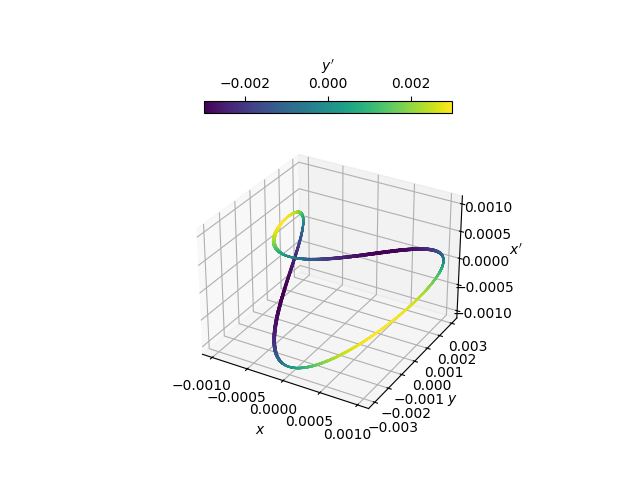

In [26]:
par_id =1
every = 1
fig=plt.figure()
ax=plt.axes(projection='3d')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$x'$")

p=ax.scatter(xarr[::every, par_id], yarr[::every, par_id], xparr[::every, par_id], s=0.1, c=yparr[::every, par_id])
#p=ax.scatter(xcal[-temp::every], ycal[-temp::every], pycal[-temp::every], s=0.1, c=pxcal[-temp::every])
cbar=plt.colorbar(p, location='top', shrink=0.5)
cbar.ax.set_xlabel(r"$y'$");

## Orbit Stability and Resonances

We have learned that a single sextrupole in an else-where linear ring can excite a large range of resonance and some of then will make motion unstable.  A mathematical guidance of finding the orbit stability when an integrable system is nonlinearly perturbed is the KAM theory from Kolmogorov, Arnold and Moser. which states

:::{admonition} KAM Theory
:class: note
A n-dimentional integrable Hamiltonian will confine the motion on a n-D torus.  KAM theory state that, such tori will only be distorted not destroyed by a weak nonlinear perturbation und the following conditions:
* Non-resonance: the tune is sufficiently irrational, in the Diophantine sense,

$$
\left|x-\frac{q}{q}\right| > \frac{c}{q^2}
$$

* Non-degeneracy: the Hamiltonian 's Hessian is not singular.
:::

In reality, the working point should avoid any lower order ($q$) resoances.  

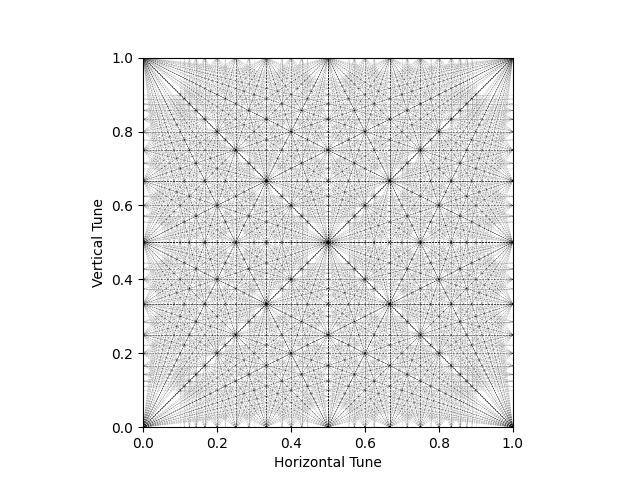

In [29]:
import numpy as np
def draw_resonance_lines(ax, tunex_range=[0,1], tuney_range=[0,1], synchro_line=False,
                         synchro_order=[1,], synchro_freq=0.01,
                         max_order=8, line_width=0.4, coupling=True, working_point=None,
                         maximum_alpha=0.8, minimum_alpha=0.2):
    n_dots = 2
    ax.set_aspect('equal')
    ax.set_xlabel('Horizontal Tune')
    ax.set_ylabel('Vertical Tune')
    ax.set_xlim(tunex_range)
    ax.set_ylim(tuney_range)

    if working_point is not None:
        ax.plot(working_point[0], working_point[1], marker='.')
    for order in range(1,max_order+1):
        xdots=np.linspace(tunex_range[0], tunex_range[1],n_dots)
        for l in range(1, order):
            ydots=np.zeros_like(xdots)+1.0*l/order
            ax.plot(xdots,ydots,'k--', alpha=minimum_alpha+maximum_alpha*(max_order-order)/max_order, linewidth=line_width)
            ax.plot(ydots,xdots,'k--', alpha=minimum_alpha+maximum_alpha*(max_order-order)/max_order, linewidth=line_width)
    if coupling==False:
        return
    for xorder in range(1,max_order):
        for yorder in range(1,max_order-xorder+1):
            order=xorder+yorder
            for l in range(-order+1, order):
                ydots=np.linspace(tuney_range[0], tuney_range[1],n_dots)
                xdots=(l-yorder*ydots)/xorder
                ax.plot(xdots,ydots,'k--', alpha=minimum_alpha+maximum_alpha*(max_order-abs(order))/max_order, linewidth=line_width*0.8)
                xdots=(l+yorder*ydots)/xorder
                ax.plot(xdots,ydots,'k--', alpha=minimum_alpha+maximum_alpha*(max_order-abs(order))/max_order, linewidth=line_width*0.8)
    if synchro_line:
        for sorder in synchro_order:
            for xorder in range(1, max_order-sorder):
                for yorder in range(1, max_order - sorder - xorder + 1):
                    order = xorder + yorder
                    for l in range(-order + 1, order):
                        ydots = np.linspace(tuney_range[0], tuney_range[1], n_dots)
                        xdots = (l - sorder*synchro_freq - yorder * ydots) / xorder
                        ax.plot(xdots, ydots, 'k--',
                                alpha=minimum_alpha + maximum_alpha * (max_order - abs(order)) / max_order,
                                linewidth=line_width * 0.8)
                        xdots = (l - sorder*synchro_freq + yorder * ydots) / xorder
                        ax.plot(xdots, ydots, 'k--',
                                alpha=minimum_alpha + maximum_alpha * (max_order - abs(order)) / max_order,
                                linewidth=line_width * 0.8)
                        xdots = (l + sorder * synchro_freq - yorder * ydots) / xorder
                        ax.plot(xdots, ydots, 'k--',
                                alpha=minimum_alpha + maximum_alpha * (max_order - abs(order)) / max_order,
                                linewidth=line_width * 0.8)
                        xdots = (l + sorder * synchro_freq + yorder * ydots) / xorder
                        ax.plot(xdots, ydots, 'k--',
                                alpha=minimum_alpha + maximum_alpha * (max_order - abs(order)) / max_order,
                                linewidth=line_width * 0.8)

    return

import matplotlib.pyplot as plt
%matplotlib widget
fig,ax=plt.subplots()
maxorder=10
draw_resonance_lines(ax, max_order=maxorder)
fig.set_label('Maximal Order='+str(maxorder))

